# [Introduction to Data Science 2020](https://hy-tktl.github.io/ids/projects/): Mini-project
## Processing, plotting, and forecasting average room prices
The idea of this data science project is to calculate accommodation prices found on the internet,
to plot the data and finally to try to forecast future prices.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load Data
[Accomodation data](http://pxnet2.stat.fi/PXWeb/pxweb/en/StatFin/StatFin__lii__matk/statfin_matk_pxt_11lm.px/) sourced from [stat.fi](http://stat.fi).

In [2]:
df = pd.read_csv("data.csv", sep=";", skiprows=1, index_col=0, encoding="latin_1", na_values='.')
df.head()

,1995M01 Number of establishments,1995M01 Number of bedrooms,"1995M01 Occupancy rate of bedrooms, %",1995M01 Average room price,1995M01 Number of bed-places,"1995M01 Occupancy rate of bed-places, %",1995M01 Average price per night,"1995M01 RevPar, EUR",1995M01 Nights spent,1995M01 Domestic nights,...,2020M08* Number of bedrooms,"2020M08* Occupancy rate of bedrooms, %",2020M08* Average room price,2020M08* Number of bed-places,"2020M08* Occupancy rate of bed-places, %",2020M08* Average price per night,"2020M08* RevPar, EUR",2020M08* Nights spent,2020M08* Domestic nights,2020M08* Foreign nights
Municipality,,,,,,,,,,,,,,,,,,,,,
Espoo,13,1024,35.7,51.43,2024,26.8,34.53,18.36,15673,11063,...,1133,47.7,95.87,2156,38.7,62.41,45.73,21909,16572,5337
Helsinki,38,5837,50.5,69.17,10615,36.6,52.82,34.90,120076,52555,...,8555,35.0,96.98,16562,30.1,57.85,33.95,147148,113314,33834
Inari,13,754,35.7,48.35,1792,24.0,27.62,17.24,13094,8118,...,1246,25.8,75.67,2775,21.9,41.09,19.52,18798,17506,1292
Joensuu,10,535,31.5,56.84,945,23.0,44.51,17.93,6699,6041,...,632,51.9,95.34,1290,38.0,63.29,49.51,14188,13502,686
Jyväskylä,10,1041,32.5,52.07,1942,23.9,37.78,16.91,14135,12486,...,1544,50.9,94.94,3086,42.3,56.02,48.31,36263,35266,997


**We see that the indecies are the name of cities and column names are time-series of feature values.**

### Transpose table
**Now the rows become the columns, so the indecies become the column names (e.g. cities).**

In [3]:
df = df.transpose()
df.head()

Municipality,Espoo,Helsinki,Inari,Joensuu,Jyväskylä,Kittilä,Kuopio,Kuusamo,Lahti,Lappeenranta,Mikkeli,Oulu,Pori,Rovaniemi,Savonlinna,Sodankylä,Tampere,Turku,Vaasa,Vantaa
1995M01 Number of establishments,13.00,38.00,13.00,10.00,10.00,3.00,17.00,7.00,10.00,9.00,8.00,11.00,7.00,17.00,9.00,7.00,16.00,14.00,10.00,8.00
1995M01 Number of bedrooms,1024.00,5837.00,754.00,535.00,1041.00,233.00,1193.00,512.00,931.00,583.00,505.00,961.00,631.00,1120.00,402.00,229.00,1870.00,1745.00,821.00,1282.00
"1995M01 Occupancy rate of bedrooms, %",35.70,50.50,35.70,31.50,32.50,61.90,38.10,32.70,35.00,33.70,40.40,40.50,26.50,46.10,48.90,25.00,39.80,39.50,25.60,31.20
1995M01 Average room price,51.43,69.17,48.35,56.84,52.07,54.81,43.01,56.86,45.67,50.71,52.39,53.02,49.65,48.99,47.99,46.44,52.82,44.06,53.85,50.73
1995M01 Number of bed-places,2024.00,10615.00,1792.00,945.00,1942.00,628.00,2621.00,1186.00,1685.00,1070.00,978.00,1761.00,1130.00,2220.00,896.00,706.00,3382.00,3104.00,1734.00,2082.00


### Extract feature names from the indecies

In [4]:
features = set(map(lambda index: index[7:].replace('*', ' ').strip(), df.index.values))
features

{'Average price per night',
 'Average room price',
 'Domestic nights',
 'Foreign nights',
 'Nights spent',
 'Number of bed-places',
 'Number of bedrooms',
 'Number of establishments',
 'Occupancy rate of bed-places, %',
 'Occupancy rate of bedrooms, %',
 'RevPar, EUR'}

### Filter by feature name

In [5]:
def filter_by_feature(df, name):
    indecies = list(filter(lambda index: index[8:].endswith(name), df.index.values))
    return df.loc[indecies]

averageRoomPrice = filter_by_feature(df, 'Average room price')
averageRoomPrice.head()

Municipality,Espoo,Helsinki,Inari,Joensuu,Jyväskylä,Kittilä,Kuopio,Kuusamo,Lahti,Lappeenranta,Mikkeli,Oulu,Pori,Rovaniemi,Savonlinna,Sodankylä,Tampere,Turku,Vaasa,Vantaa
1995M01 Average room price,51.43,69.17,48.35,56.84,52.07,54.81,43.01,56.86,45.67,50.71,52.39,53.02,49.65,48.99,47.99,46.44,52.82,44.06,53.85,50.73
1995M02 Average room price,51.89,70.58,45.49,57.25,53.47,66.69,51.19,62.84,44.74,51.47,52.99,58.70,51.29,48.88,52.39,63.29,56.28,54.07,54.88,54.32
1995M03 Average room price,53.72,71.01,58.13,58.27,53.27,77.17,49.19,61.87,47.70,51.15,53.44,54.46,53.44,49.18,52.43,52.58,55.52,53.58,54.98,53.32
1995M04 Average room price,51.13,68.28,70.20,54.74,53.11,79.93,48.51,62.16,45.94,50.21,52.62,55.60,50.85,46.95,55.35,57.79,55.28,55.04,54.25,53.27
1995M05 Average room price,58.57,70.92,39.70,56.25,54.27,40.07,49.34,43.99,45.22,54.15,56.06,53.25,50.57,44.77,63.69,44.49,54.61,55.31,53.73,57.01


### Process indecies
**The idea is to rewrite the indecies into date format.**

In [6]:
def fix_index(df):
    new_index = {}
    for col in df.index:
        date = '-'.join(col[:7].split('M') + ['01'])
        new_index[col] = pd.to_datetime(date)
    return new_index

averageRoomPrice = averageRoomPrice.rename(index = fix_index(averageRoomPrice))
averageRoomPrice

Municipality,Espoo,Helsinki,Inari,Joensuu,Jyväskylä,Kittilä,Kuopio,Kuusamo,Lahti,Lappeenranta,Mikkeli,Oulu,Pori,Rovaniemi,Savonlinna,Sodankylä,Tampere,Turku,Vaasa,Vantaa
1995-01-01,51.43,69.17,48.35,56.84,52.07,54.81,43.01,56.86,45.67,50.71,52.39,53.02,49.65,48.99,47.99,46.44,52.82,44.06,53.85,50.73
1995-02-01,51.89,70.58,45.49,57.25,53.47,66.69,51.19,62.84,44.74,51.47,52.99,58.70,51.29,48.88,52.39,63.29,56.28,54.07,54.88,54.32
1995-03-01,53.72,71.01,58.13,58.27,53.27,77.17,49.19,61.87,47.70,51.15,53.44,54.46,53.44,49.18,52.43,52.58,55.52,53.58,54.98,53.32
1995-04-01,51.13,68.28,70.20,54.74,53.11,79.93,48.51,62.16,45.94,50.21,52.62,55.60,50.85,46.95,55.35,57.79,55.28,55.04,54.25,53.27
1995-05-01,58.57,70.92,39.70,56.25,54.27,40.07,49.34,43.99,45.22,54.15,56.06,53.25,50.57,44.77,63.69,44.49,54.61,55.31,53.73,57.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,53.19,82.52,53.78,101.85,97.02,69.88,107.06,73.83,81.39,107.17,92.17,94.34,72.75,95.05,102.04,88.17,86.72,91.96,106.35,95.77
2020-05-01,48.40,98.49,77.42,99.03,95.60,58.27,101.32,79.74,74.09,93.30,90.18,87.37,73.82,83.01,90.89,95.35,90.88,97.89,108.05,101.33
2020-06-01,56.24,93.78,80.51,98.39,89.77,52.75,106.50,71.45,71.20,91.72,80.56,93.62,106.55,78.76,97.47,95.10,86.39,109.02,96.69,98.17
2020-07-01,59.66,92.13,76.33,90.39,93.10,68.81,107.03,87.25,83.60,101.73,101.94,100.43,108.81,86.47,116.54,77.36,106.10,114.90,95.06,96.94


**Here, we do the same for all of the features.**

In [7]:
dataframes = {}
index = None
for feature in features:
    new_df = filter_by_feature(df, feature)
    index  = fix_index(new_df)
    new_df.rename(index = index, inplace=True)
    dataframes[feature] = new_df

**Print the values of the column** Helsinki **in the resulting dateframes**

In [8]:
for name, frame in dataframes.items():
    print(name)
    print(frame.Helsinki.head())
    print()

Average room price
1995-01-01    69.17
1995-02-01    70.58
1995-03-01    71.01
1995-04-01    68.28
1995-05-01    70.92
Name: Helsinki, dtype: float64

Number of bedrooms
1995-01-01    5837.0
1995-02-01    5834.0
1995-03-01    5810.0
1995-04-01    5831.0
1995-05-01    5903.0
Name: Helsinki, dtype: float64

RevPar, EUR
1995-01-01    34.90
1995-02-01    35.53
1995-03-01    42.52
1995-04-01    33.75
1995-05-01    47.18
Name: Helsinki, dtype: float64

Average price per night
1995-01-01    52.82
1995-02-01    53.91
1995-03-01    54.24
1995-04-01    51.25
1995-05-01    51.03
Name: Helsinki, dtype: float64

Domestic nights
1995-01-01    52555.0
1995-02-01    48970.0
1995-03-01    63252.0
1995-04-01    49446.0
1995-05-01    61671.0
Name: Helsinki, dtype: float64

Occupancy rate of bed-places, %
1995-01-01    36.6
1995-02-01    36.5
1995-03-01    43.7
1995-04-01    36.4
1995-05-01    51.0
Name: Helsinki, dtype: float64

Number of establishments
1995-01-01    38.0
1995-02-01    38.0
1995-03-01   

**Save the dateframes in csv-format.**

In [9]:
import os
try:
    os.mkdir("data")
except: pass

for name, frame in dataframes.items():
    filename = name.split(",")[0]
    filename = "data/" + filename.replace(" ", "_") + ".csv"
    print("Saving", filename)
    frame.to_csv(filename)

Saving data/Average_room_price.csv
Saving data/Number_of_bedrooms.csv
Saving data/RevPar.csv
Saving data/Average_price_per_night.csv
Saving data/Domestic_nights.csv
Saving data/Occupancy_rate_of_bed-places.csv
Saving data/Number_of_establishments.csv
Saving data/Number_of_bed-places.csv
Saving data/Occupancy_rate_of_bedrooms.csv
Saving data/Foreign_nights.csv
Saving data/Nights_spent.csv


## Plotting the data
We plot using geopandas a shapefile found in the [internet](https://ec.europa.eu/eurostat/cros/content/fi-shapefile_en).



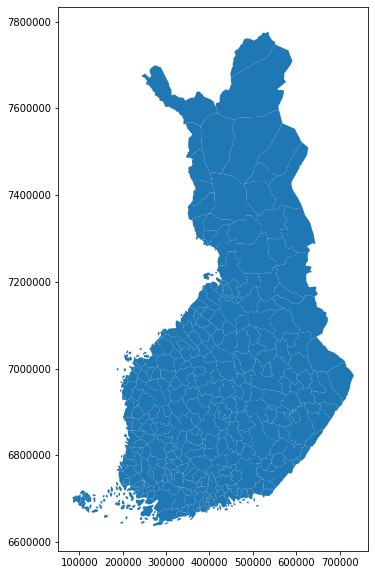

In [10]:
import pandas as pd
import geopandas as gpd

# https://ec.europa.eu/eurostat/cros/content/fi-shapefile_en
areas = gpd.read_file('lma_fin/LMA_LAU_areas_FIN.shp')
ax = areas.plot(figsize=(10, 10))

**The data that we want to plot.**

In [11]:
averageRoomPrice = dataframes['Average price per night']
averageRoomPrice.head()

Municipality,Espoo,Helsinki,Inari,Joensuu,Jyväskylä,Kittilä,Kuopio,Kuusamo,Lahti,Lappeenranta,Mikkeli,Oulu,Pori,Rovaniemi,Savonlinna,Sodankylä,Tampere,Turku,Vaasa,Vantaa
1995-01-01,34.53,52.82,27.62,44.51,37.78,27.21,29.45,30.90,32.18,36.10,33.99,35.25,41.59,33.76,30.84,29.59,37.78,31.78,40.97,34.40
1995-02-01,36.07,53.91,22.11,41.06,35.66,29.73,26.97,31.78,29.66,37.72,33.80,35.33,41.87,36.05,29.58,31.98,40.13,37.80,33.03,38.07
1995-03-01,35.69,54.24,28.74,42.37,36.81,33.88,27.40,33.44,33.69,35.68,34.44,32.59,41.45,32.11,31.22,26.73,39.62,39.53,35.27,36.35
1995-04-01,35.12,51.25,35.09,40.59,35.31,36.61,28.08,31.56,33.01,34.29,32.66,33.09,37.42,30.32,32.19,27.94,38.69,37.18,34.14,36.36
1995-05-01,36.79,51.03,22.44,42.26,38.42,20.86,33.53,25.23,33.59,34.64,35.92,33.95,38.44,32.22,38.38,29.75,38.77,39.23,34.07,38.97


We'll be plotting the mean of average room price per night.

In [12]:
import json

from bokeh.io import output_file, show, output_notebook
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson
from bokeh.palettes import YlOrRd6 as palette
from bokeh.plotting import figure, save
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper, GeoJSONDataSource
from bokeh.palettes import YlGnBu7 as palette

output_notebook()
palette.reverse()
color_mapper = LogColorMapper(palette=palette)

data = json.loads(areas.to_json())
for i in range(len(data['features'])):
    props = data['features'][i]['properties']
    name = props['Name']
    if name in averageRoomPrice.columns.values:
        price = averageRoomPrice[name].mean()
    else:
        price = 0
    props['price'] = price

geo_source = GeoJSONDataSource(geojson=json.dumps(data))

TOOLTIPS = [
    ('Municipality', '@Name'),
    ('Room Price / Night', '@price')
]

p = figure(background_fill_color="lightblue", tooltips=TOOLTIPS)
p.patches('xs', 'ys', source=geo_source, fill_color={'field': 'price', 'transform': color_mapper}, line_width=3)
show(p)

Loading BokehJS ...

### Plotting time-series data
The first plot is between 1995 and 2020. We can see that there is both seasonal variation and trend.

Text(0, 0.5, 'Euros')

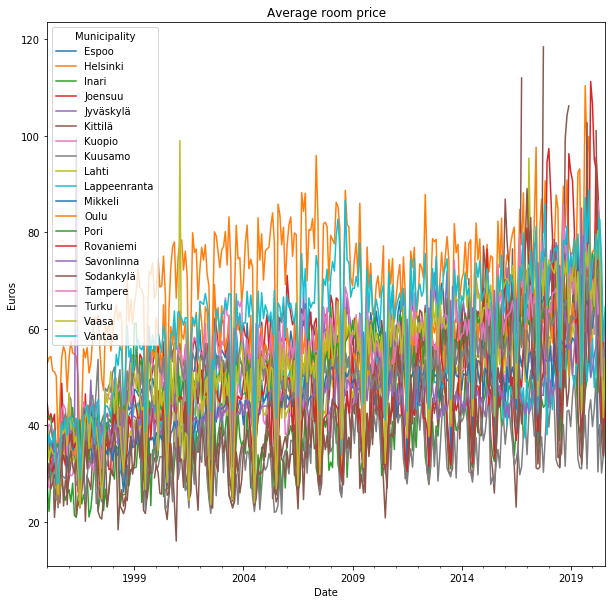

In [13]:
# Set image size
plt.rcParams['figure.figsize'] = (10, 10)
averageRoomPrice.plot()

plt.title("Average room price")
plt.xlabel("Date")
plt.ylabel("Euros")

The first plot is between 1995 and 2020. We can see that there is both seasonal variation and trend.

Text(0, 0.5, 'Euros')

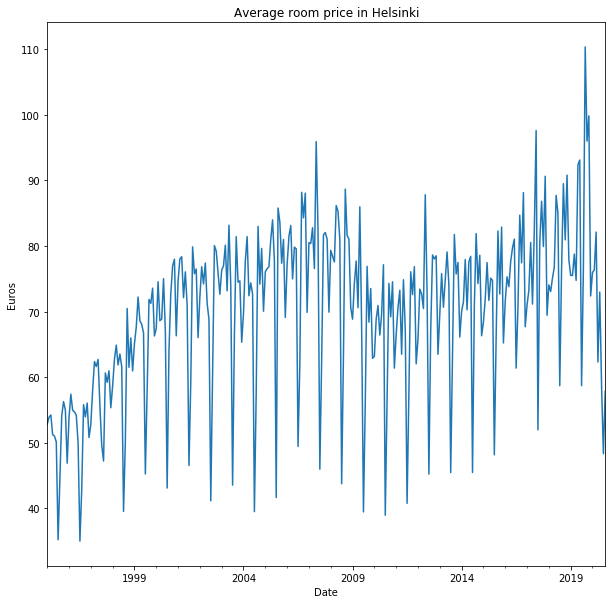

In [14]:
averageRoomPrice.Helsinki.plot()
plt.title("Average room price in Helsinki")
plt.xlabel("Date")
plt.ylabel("Euros")

Here we zoom in into the year 2018 to see the seasonal variation better. The room price seems to be highest at three times in the year.

Text(0, 0.5, 'Euros')

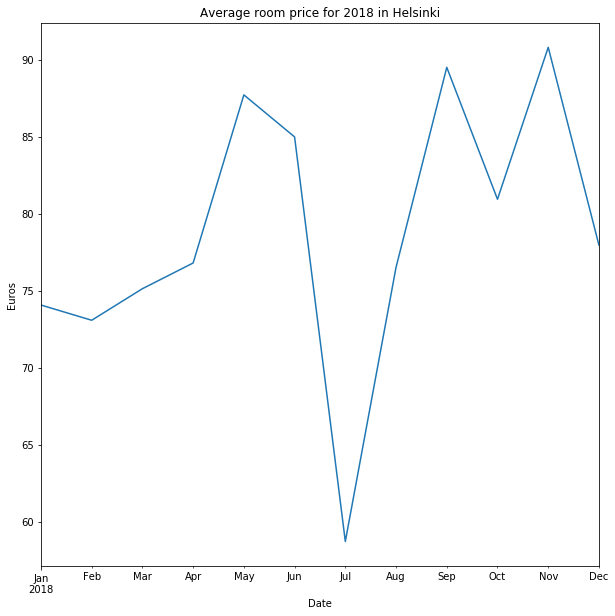

In [15]:
averageRoomPrice.Helsinki.loc['2018-01-01':'2018-12-31'].plot()
plt.title("Average room price for 2018 in Helsinki")
plt.xlabel("Date")
plt.ylabel("Euros")

Here we see the effect of covid-19 on room prices in the time series plot in the time interval between 2018 - 2020.

Text(0, 0.5, 'Euros')

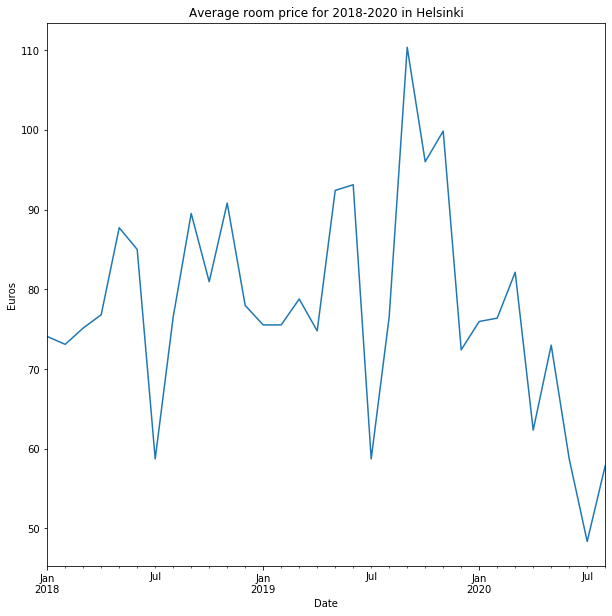

In [16]:
averageRoomPrice.Helsinki.loc['2018-01-01':].plot()
plt.title("Average room price for 2018-2020 in Helsinki")
plt.xlabel("Date")
plt.ylabel("Euros")

### Split data into train and test set
We import usefull functions from sktime library that we'll be using to forecast.
First we split the data into train and test set and then plot them. The test set is set to be the last three years of the data

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe4334f66d0>)

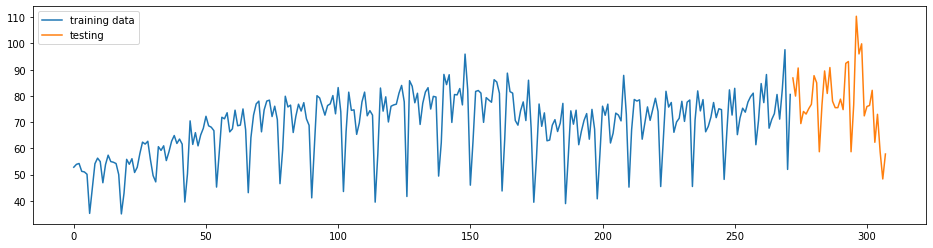

In [17]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting.forecasting import plot_ys

y = pd.Series(averageRoomPrice.Helsinki.values)
y_train, y_test = temporal_train_test_split(y, test_size=3*12)
plot_ys(y_train, y_test, labels=["training data", "testing"])

In [18]:
# Create forecast indecies
forecast_days = 10
forecast = np.arange(y_test.size + forecast_days) + 1
forecast

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

### Detrend

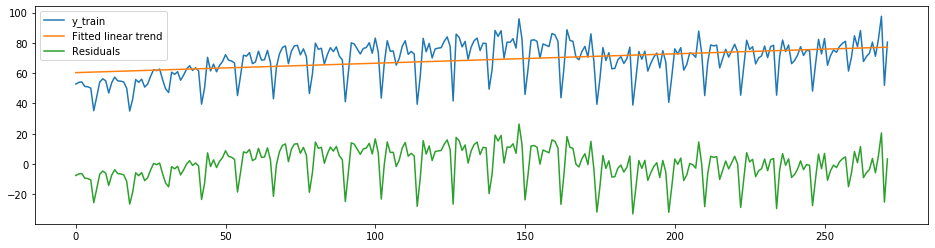

In [19]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformers.single_series.detrend import Detrender

# liner detrending
forecaster = PolynomialTrendForecaster()
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster()
fh_ins = -np.arange(len(y_train)) # in-sample forecasting horizon
y_pred = forecaster.fit(y_train).predict(fh=fh_ins)

plot_ys(y_train, y_pred, yt, labels=["y_train", "Fitted linear trend", "Residuals"]);

0.10305140502481734

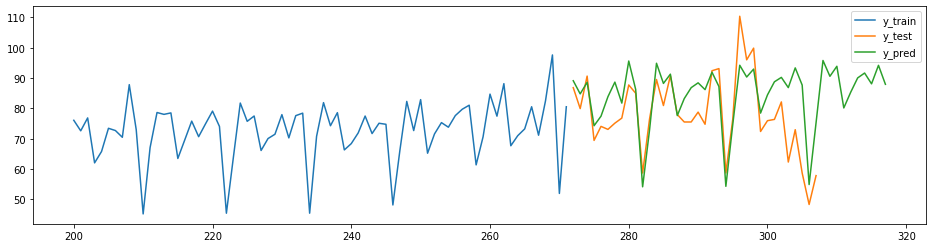

In [20]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformers.single_series.detrend import Deseasonalizer
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.performance_metrics.forecasting import smape_loss
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import AutoARIMA

forecaster = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=12)),
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
    ("forecast", ReducedRegressionForecaster(regressor=RandomForestRegressor(), window_length=15, strategy="recursive"))    
])

forecaster.fit(y_train)
y_pred = forecaster.predict(forecast)
fig, ax = plot_ys(y_train[200:], y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred[:y_test.size])